![bottleneck](logo.png)
# Sommaire
**Objectifs**
 - <a href="#C1">Missions</a>

**Préparation des données**
- <a href="#C2">Nettoyage du jeu de données</a>
    - <a href="#C3">Initialisation du projet</a>
    - <a href="#C4">Vérification et transformation de données</a>

**Partie 1 : Rapprochement des exports**
- <a href="#C5">Rapprochement des 2 tableaux</a>
 
**Partie 2 : Calculs**
- <a href="#C6">Calcul du CA par produit</a>
- <a href="#C7">Calcul du total du chiffre d’affaires réalisé en ligne</a>

 
**Partie 3 : Analyse univariée**
 - <a href="#C8">Analyse de la variable "prix"</a>
     - <a href="#C9">Représentation empirique</a>
     - <a href="#C10">Calcul du Z-score</a>
     - <a href="#C11">Calcul de l'écart interquartile</a>
     - <a href="#C12">Représentation graphique des outliers</a>
     - <a href="#C13">Conclusion</a>

# <a name="C1"> Missions</a>

1. Premièrement, j’ai besoin que tu rapproches deux exports : un export de l’ERP contenant les références produit, leur prix de vente et leur état de stock, et un export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes...).
L’export issu de la boutique en ligne contient le nombre de ventes pour chaque produit depuis sa mise en ligne, il ne permet pas d’analyser l'évolution des ventes dans le temps.
Je vais t’envoyer un mail dès la fin de notre entretien avec ces 2 exports en pièce jointe.
En plus de ces 2 exports, tu vas bénéficier d’une aide précieuse car Sylvie, notre ancienne stagiaire, a réalisé un travail de fourmi. Elle a créé un tableau Excel qui permet d’établir le lien entre la référence du produit dans l’ERP (product_id) et la référence du même produit dans la base de la boutique en ligne (SKU). 

2. Deuxièmement, une fois le rapprochement effectué, je souhaiterais avoir le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne.

3. Troisièmement et pour finir, je me demande s’il n’y a pas eu des erreurs de saisie dans certains prix des produits. J'aimerais que tu effectues une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.


**Les fichiers csv à disposition sont**
- erp.xlsx : fichier issu de l’ERP
- web.xlsx : fichier de la table produit de notre plateforme de vente en ligne
- liaison.xlsx : lien entre la référence du produit dans l’ERP (product_id) et la référence du même produit dans la base de la boutique en ligne (SKU)

# <a name="C2">Nettoyage du jeu de données</a>

## <a name = "C3">Initialisation du projet</a>

Import des librairies

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#On indique que l'on veut voir apparaître les graphiques dans le notebook, sinon on ne verrait rien
%matplotlib inline

Import des fichiers

In [83]:
chemin_fichiers='./fichiers/'
df_erp= pd.read_excel(chemin_fichiers+'erp.xlsx')
df_web=pd.read_excel(chemin_fichiers+'web.xlsx')
df_liaison=pd.read_excel(chemin_fichiers+'liaison.xlsx')

/Users/laetitia/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/laetitia/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/laetitia/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Variables

In [84]:
pd.set_option("display.max_columns", 25)
pd.set_option("display.max_rows", 100)

## <a name ="C4">Vérification et transformation de données</a>

### Valeurs vides ou à zéro

Après identification des valeurs nulles et égales à 0, il faudra décider quoi en faire.<br>
J'affiche le nombre de lignes par fichier qui me permettra de savoir si le nombre de valeurs nulles par colonnes est conséquent ou pas.

In [85]:
# Nombre de lignes et colonnes par fichiers
print (f'Le fichier web contient {df_web.shape[0]} lignes et {df_web.shape[1]} colonnes.')
print (f'Le fichier erp contient {df_erp.shape[0]} lignes et {df_erp.shape[1]} colonnes.')
print (f'Le fichier liaison contient {df_liaison.shape[0]} lignes et {df_liaison.shape[1]} colonnes.')

Le fichier web contient 1513 lignes et 28 colonnes.
Le fichier erp contient 825 lignes et 5 colonnes.
Le fichier liaison contient 825 lignes et 2 colonnes.


In [86]:
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,...,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,...,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,...,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,...,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,...,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,...,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Renommage de la colonne sku en web_id pour faciliter ensuite les jointures ou autre comparaison

In [87]:
df_web.rename(columns={"sku":"web_id"}, inplace=True)
df_web.head(1)

,web_id,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,...,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,...,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [88]:
df_web.isnull().sum() | df_web.isna().sum()

web_id                     85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

On peut supprimer les colonnes 
- tax_class
- post_content
- post_password
- post_content_filtered

qui ne contiennent aucune donnée sur la totalité des lignes. <br>

Le paramètre how=all va nous permettre de supprimer toutes les colonnes si toutes les lignes sont vides.

In [89]:
df_web.dropna(axis=1, how="all", inplace=True)
df_web.shape

(1513, 24)

In [90]:
(df_web==0).sum()

web_id                  0
virtual              1513
downloadable         1513
rating_count         1513
average_rating       1430
total_sales           660
tax_status              0
post_author             0
post_date               0
post_date_gmt           0
post_title              0
post_excerpt            0
post_status             0
comment_status          0
ping_status             0
post_name               0
post_modified           0
post_modified_gmt       0
post_parent          1430
guid                    0
menu_order           1430
post_type               0
post_mime_type          0
comment_count        1430
dtype: int64

Quelques colonnes ne contiennent que des valeurs à zéro.<br>
D'autres ont un nombre de valeurs à zéro élevé et proche du total de lignes.<br>
J'additionne les valeurs à zéro aux valeurs vides pour avoir un aperçu de ce que ça représente en totalité sur le nombre de lignes du fichier.

In [91]:
((df_web==0).sum() + (df_web.isnull().sum() | df_web.isna().sum()))

web_id                 85
virtual              1513
downloadable         1513
rating_count         1513
average_rating       1513
total_sales           743
tax_status            797
post_author            83
post_date              83
post_date_gmt          83
post_title             83
post_excerpt          797
post_status            83
comment_status         83
ping_status            83
post_name              83
post_modified          83
post_modified_gmt      83
post_parent          1513
guid                   83
menu_order           1513
post_type              83
post_mime_type        799
comment_count        1513
dtype: int64

On se rend compte que 7 colonnes n'ont que des 0 ou du vide :
- virtual
- downloadable
- rating_count
- average_rating
- post_parent
- menu_order
- comment_count<br>
Ces colonnes sont donc inutiles et je les supprime.

In [92]:
df_web.drop(columns={'virtual','downloadable','rating_count','average_rating','post_parent','menu_order','comment_count'}, inplace=True)
df_web.shape

(1513, 17)

Si certaines lignes n'ont aucune donnée, je les supprime également.
Je nettoie de la même manière que précédemment en utilisant l'axe 0, celui des lignes et avec la condition que toutes les colonnes de chaque ligne soient vides.

In [93]:
df_web.dropna(axis=0, how="all", inplace=True)
df_web.shape

(1430, 17)

J'identifie les web_id vide pour les supprimer : je ne peux pas travailler sur les produits s'ils n'ont pas d'ID, je ne pourrai pas les rapprocher de la table erp.

In [94]:
df_web[df_web.web_id.isna()]

,web_id,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
470,NaN,0.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
471,NaN,0.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


In [95]:
df_web.drop(df_web[df_web.web_id.isna()].index, inplace=True)
df_web.shape

(1428, 17)

In [96]:
df_erp.tail()

,product_id,onsale_web,price,stock_quantity,stock_status
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock
824,7338,1,16.3,45,instock


In [97]:
df_erp.isnull().sum() | df_erp.isna().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [98]:
(df_erp==0).sum()

product_id          0
onsale_web        108
price               0
stock_quantity    188
stock_status        0
dtype: int64

In [99]:
df_liaison.tail()

,product_id,id_web
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1
824,7338,16230


Renommage de la colonne id_web en web_id pour garder une normalisation du nommage des id

In [100]:
df_liaison.rename(columns={"id_web":"web_id"}, inplace=True)
df_liaison.tail(1)

,product_id,web_id
824,7338,16230


In [101]:
(df_liaison==0).sum()

product_id    0
web_id        0
dtype: int64

In [102]:
df_liaison.isnull().sum()  | df_liaison.isna().sum()

product_id     0
web_id        91
dtype: int64

91 valeurs vides, ce qui veut dire que sur 91 produits, je ne pourrai pas faire la liaison entre les infos de l'erp et du web.<br>
Ces valeurs sont donc inexploitables et il n'est pas nécessaire de les conserver.

In [103]:
df_liaison.dropna(axis=0, how="any", inplace=True)
df_liaison.shape

(734, 2)

In [104]:
# Nombre de lignes et colonnes par fichiers après modification
print (f'Le fichier web contient {df_web.shape[0]} lignes et {df_web.shape[1]} colonnes.')
print (f'Le fichier erp contient {df_erp.shape[0]} lignes et {df_erp.shape[1]} colonnes.')
print (f'Le fichier liaison contient {df_liaison.shape[0]} lignes et {df_liaison.shape[1]} colonnes.')

Le fichier web contient 1428 lignes et 17 colonnes.
Le fichier erp contient 825 lignes et 5 colonnes.
Le fichier liaison contient 734 lignes et 2 colonnes.


#### Conclusion
**Fichier web** : Nous sommes passés de 1513 lignes et 28 colonnes à 1428 lignes et 17 colonnes.<br>
**Fichier erp** : Pas de valeurs supprimées<br>
**Fichier liaison** : 91 lignes supprimées<br>

Nous sommes débarassés des valeurs manquantes ou à zéros inutiles.

### Type de données

Je vérifie si le type de chaque colonne des 3 fichiers est cohérent et apporte les modifications jugées nécessaires.<br>

In [105]:
df_web.dtypes

web_id                       object
total_sales                 float64
tax_status                   object
post_author                 float64
post_date            datetime64[ns]
post_date_gmt        datetime64[ns]
post_title                   object
post_excerpt                 object
post_status                  object
comment_status               object
ping_status                  object
post_name                    object
post_modified        datetime64[ns]
post_modified_gmt    datetime64[ns]
guid                         object
post_type                    object
post_mime_type               object
dtype: object

In [106]:
df_erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [107]:
df_liaison.dtypes

product_id     int64
web_id        object
dtype: object

Je souhaite modifier le type de la colonne product_id en string, car c'est le type de la colonne web_id. Changer la colonne product_id en string plutôt que web_id en int permet d'éviter de changer la valeur des données présentes dans web_id : <br>
**bon-cadeau-25-euros** et **13127-1** auraient dû être modifiés par exemple.<br>

Je convertis aussi web_id en string car le mélange d'int et de str me bloque pour des tris.<br>

In [108]:
df_liaison.product_id=df_liaison.product_id.astype('str')
df_liaison.web_id=df_liaison.web_id.astype('str')
df_erp.product_id=df_erp.product_id.astype('str')
df_web.web_id=df_web.web_id.astype('str')

### Évenutels doublons

In [109]:
df_erp.loc[df_erp["product_id"].duplicated(keep=False),:]

,product_id,onsale_web,price,stock_quantity,stock_status


In [110]:
df_web.sort_values('web_id', ascending=False, inplace=True)
df_web["web_id"].duplicated()
df_web.head(6)

,web_id,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
0,bon-cadeau-25-euros,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1209,bon-cadeau-25-euros,10.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,NaN,publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
1201,9937,4.0,NaN,2.0,2018-05-17 12:55:13,2018-05-17 10:55:13,Marcel Richaud Cairanne Rouge Les Estrambords ...,NaN,publish,closed,closed,marcel-richaud-cairanne-rouge-les-estrambords-...,2019-06-26 09:32:25,2019-06-26 07:32:25,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
422,9937,4.0,taxable,2.0,2018-05-17 12:55:13,2018-05-17 10:55:13,Marcel Richaud Cairanne Rouge Les Estrambords ...,"Un vin généreux, profond et intense. Les notes...",publish,closed,closed,marcel-richaud-cairanne-rouge-les-estrambords-...,2019-06-26 09:32:25,2019-06-26 07:32:25,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
215,9636,0.0,taxable,2.0,2018-03-22 10:44:57,2018-03-22 09:44:57,Wemyss Malts Blended Malt Scotch Whisky The Hi...,The Hive est un assemblage de malts du Speysid...,publish,closed,closed,whisky-wemyss-the-hive-12-ans,2020-08-19 17:45:03,2020-08-19 15:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1011,9636,0.0,NaN,2.0,2018-03-22 10:44:57,2018-03-22 09:44:57,Wemyss Malts Blended Malt Scotch Whisky The Hi...,NaN,publish,closed,closed,whisky-wemyss-the-hive-12-ans,2020-08-19 17:45:03,2020-08-19 15:45:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg


On voit que le web_id est toujours en double. Il faut chercher une colonne supplémentaire pour isoler de vrais doublons.<br>
J'utilise le post_type qui différencie le lien du produit et son image

In [111]:
df_web[df_web.duplicated(keep=False, subset=["web_id", "post_type"])]

,web_id,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type


Je vérifie qu'il y a autant de ligne avec la valeur *product* qu'avec *management*.<br>
Si le compteur est identique, je supprime toutes les lignes avec la valeur "attachement" sinon, lors du merge, je vais récupérer des informations en double, dont le prix, le stock,...ce qui va fausser les calculs.

In [112]:
check_post_type=df_web.post_type.value_counts()
check_post_type

product       714
attachment    714
Name: post_type, dtype: int64

Classement par web_id et post_type pour toujours avoir le *attachement* avant le *product*

In [113]:
df_web.sort_values(by=["web_id","post_type"],ascending=True, inplace=True)
df_web.head(2)

,web_id,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
1399,10014,0.0,NaN,2.0,2019-04-04 15:45:23,2019-04-04 13:45:23,Darnley's London Dry Gin Original,NaN,publish,closed,closed,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
628,10014,0.0,taxable,2.0,2019-04-04 15:45:23,2019-04-04 13:45:23,Darnley's London Dry Gin Original,"<span title="""">Un gin léger, floral et aromati...",publish,closed,closed,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


In [114]:
df_web.drop_duplicates(subset=["web_id"],keep="last", inplace=True)

In [115]:
print (f'Il reste {df_web.shape[0]} lignes et {df_web.shape[1]} colonnes.')

Il reste 714 lignes et 17 colonnes.


#### Conclusion
A priori, il n'y avait pas de réels doublon, mais j'ai supprimé toutes les lignes ayant le même ID avec un post_type différent. Il ne reste plus que des ID uniques dans le fichier web.

### Check global
Je regarde rapidement via un .describe(all) (pour avoir les variables quantitatives (pas de paramètres) et les variables qualitatives (include="O")) si je vois des anomalies dans les extrêmes.

In [116]:
df_erp.describe(include='all')

,product_id,onsale_web,price,stock_quantity,stock_status
count,825,825.000000,825.000000,825.000000,825
unique,825,NaN,NaN,NaN,2
top,3847,NaN,NaN,NaN,instock
freq,1,NaN,NaN,NaN,638
mean,NaN,0.869091,32.415636,26.496970,NaN
std,NaN,0.337506,26.795849,45.892422,NaN
min,NaN,0.000000,5.200000,0.000000,NaN
25%,NaN,1.000000,14.600000,1.000000,NaN
50%,NaN,1.000000,24.400000,11.000000,NaN
75%,NaN,1.000000,42.000000,34.000000,NaN


In [117]:
df_web.describe(include='all', datetime_is_numeric=True) #Le dernier paramètre sert à ne pas afficher le warning

,web_id,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
count,714,714.000000,714,714.000000,714,714,714,714,714,714,714,714,714,714,714,714,0
unique,714,NaN,1,NaN,NaN,NaN,711,677,1,1,1,714,NaN,NaN,714,1,0
top,10014,NaN,taxable,NaN,NaN,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,darnleys-london-dry-gin-original,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
freq,1,NaN,714,NaN,NaN,NaN,2,12,714,714,714,1,NaN,NaN,1,714,NaN
mean,NaN,4.012605,NaN,1.998599,2018-08-22 03:57:52.950980608,2018-08-22 02:29:08.581232640,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-20 21:45:25.694678272,2020-06-20 19:51:53.929971968,NaN,NaN,NaN
min,NaN,0.000000,NaN,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,NaN,NaN
25%,NaN,0.000000,NaN,2.000000,2018-02-27 20:01:12.500000,2018-02-27 19:01:12.500000,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-18 18:32:35,2020-06-18 16:32:35,NaN,NaN,NaN
50%,NaN,1.000000,NaN,2.000000,2018-04-19 14:52:10,2018-04-19 12:52:10,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-04 09:30:06.500000,2020-08-04 07:30:06.500000,NaN,NaN,NaN
75%,NaN,4.000000,NaN,2.000000,2019-01-31 14:35:47,2019-01-31 13:35:47,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-25 10:32:32,2020-08-25 08:32:32,NaN,NaN,NaN
max,NaN,96.000000,NaN,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,NaN,NaN


In [118]:
df_liaison.describe(include='all')

,product_id,web_id
count,734,734
unique,734,734
top,3847,15298
freq,1,1


#### Conclusion
Au premier coup d'oeil, pas d'anomalies.

# <a name="C5">Rapprochement des 2 tableaux </a>

Méthode :<br>
Je fais le merge en 2 temps. <br>
D'abord le tableau liaison avec les données de l'erp.<br>
Ensuite  je repars de ce dataframe pour y merger les données du fichier web.<br>
J'utilise le inner car si je n'ai pas de correspondance, entre le fichier liaison et erp, les données sont inutiles puisque le fichier liaison est le lien. Pareil pour le second merge.

In [119]:
df_liaison.shape

(734, 2)

In [120]:
df_temp_merge=df_liaison.merge(df_erp,how="inner")

In [121]:
if len(df_temp_merge) < len(df_liaison):
    print (f"On note la disparition de {len(df_liaison) - len(df_temp_merge)} lignes qui n'ont pas trouvé de correspondance lors du merge.")
print (f"Dimension du tableau : {df_temp_merge.shape}")

Dimension du tableau : (734, 6)


In [122]:
df_final=df_temp_merge.merge(df_web, how="inner")

In [123]:
if len(df_final) < len(df_temp_merge):
    print (f"On note la disparition de {len(df_temp_merge) - len(df_final)} lignes qui n'ont pas trouvé de correspondance lors du merge.")
print (f"Dimension du tableau : {df_final.shape}")

On note la disparition de 20 lignes qui n'ont pas trouvé de correspondance lors du merge.
Dimension du tableau : (714, 22)


In [124]:
df_final.head(4)

,product_id,web_id,onsale_web,price,stock_quantity,stock_status,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
0,3847,15298,1,24.2,0,outofstock,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1,3849,15296,1,34.3,0,outofstock,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
2,3850,15300,1,20.8,0,outofstock,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
3,4032,19814,1,14.1,0,outofstock,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


Je nettoie le tableau de colonnes qui semblent inutiles pour nos calculs et analyses.


In [125]:
df_final.columns

Index(['product_id', 'web_id', 'onsale_web', 'price', 'stock_quantity',
       'stock_status', 'total_sales', 'tax_status', 'post_author', 'post_date',
       'post_date_gmt', 'post_title', 'post_excerpt', 'post_status',
       'comment_status', 'ping_status', 'post_name', 'post_modified',
       'post_modified_gmt', 'guid', 'post_type', 'post_mime_type'],
      dtype='object')

In [126]:
df_final.drop(columns=['tax_status', 'post_author', 'post_date',
       'post_date_gmt',  'post_status','comment_status', 'ping_status', 'post_name', 'post_modified',
       'post_modified_gmt', 'guid', 'post_type', 'post_mime_type'], inplace=True)

In [127]:
df_final

,product_id,web_id,onsale_web,price,stock_quantity,stock_status,total_sales,post_title,post_excerpt
0,3847,15298,1,24.2,0,outofstock,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f..."
1,3849,15296,1,34.3,0,outofstock,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...
2,3850,15300,1,20.8,0,outofstock,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ..."
3,4032,19814,1,14.1,0,outofstock,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...
4,4039,19815,1,46.0,0,outofstock,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...
...,...,...,...,...,...,...,...,...,...
709,6930,16135,1,8.4,83,instock,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...
710,7023,15891,1,27.5,15,instock,0.0,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...
711,7025,15887,1,69.0,2,instock,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un..."
712,7247,13127-1,1,54.8,23,instock,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo..."


In [128]:
df_final.dtypes

product_id         object
web_id             object
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
total_sales       float64
post_title         object
post_excerpt       object
dtype: object

# <a name="C4">Calculs</a>

## <a name = "C6">Calcul du CA par produit</a>
CA = prix de vente x quantités vendues.

In [129]:
df_final["product_ca"]=df_final.price*df_final.total_sales
df_final.sort_values(by="product_ca", ascending=False, inplace=True)
df_final.head()

,product_id,web_id,onsale_web,price,stock_quantity,stock_status,total_sales,post_title,post_excerpt,product_ca
194,4334,7818,1,49.0,0,outofstock,96.0,Champagne Gosset Grand Blanc de Blancs,La bulle fine et presente se dirige vers la su...,4704.0
71,4144,1662,1,49.0,11,instock,87.0,Champagne Gosset Grand Rosé,"Le nez exprime sans détour la fraise, dans sa ...",4263.0
218,4402,3510,1,176.0,8,instock,13.0,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,2288.0
70,4142,11641,1,53.0,8,instock,30.0,Champagne Gosset Grand Millésime 2006,"L'attaque est ample, gourmande avec une belle ...",1590.0
69,4141,304,1,39.0,1,instock,40.0,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",1560.0


## <a name = "C7">Calcul du total du chiffre d’affaires réalisé en ligne</a>
Je me base sur la colonne onsale_web=1 pour récupérer le CA éligible

In [130]:
ca_online=df_final.groupby('onsale_web', as_index=False).agg({"product_ca" : "sum"})
ca_online

,onsale_web,product_ca
0,1,70568.6


Note : Après le merge, nous n'avons plus que de produits vendus en ligne. Les produits flagués "0" n'ont donc pas eu de correspondance lors du merge avec les données du web (vu que ce sont les ventes web, ça s'explique).

In [131]:
print (f"""Types de ventes dans l'erp : {",".join(str(i) for i in df_erp.onsale_web.unique())}
Types de ventes après merge temporaire : {",".join(str(i) for i in df_temp_merge.onsale_web.unique())}
Types de ventes restants après merge avec les données du web : {",".join(str(i) for i in df_final.onsale_web.unique())}
""")  

Types de ventes dans l'erp : 1,0
Types de ventes après merge temporaire : 1,0
Types de ventes restants après merge avec les données du web : 1



In [132]:
print (f"Le CA (calculé après nettoyage des données effectué plus haut) réalisé en ligne s'élève à {df_final.product_ca.sum()}€")

Le CA (calculé après nettoyage des données effectué plus haut) réalisé en ligne s'élève à 70568.6€


# <a name="C8">Analyse variable "Prix"</a>

Je vais commencer par une analyse empirique puis je vais affiner avec 2 méthodes pour trouver les valeurs aberrantes/atypiques possibles : 
- z-score
- écart interquartile

Enfin, une représentation graphique de ces outliers viendra consolider l'analyse.

In [133]:
df_final.price.describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

## <a name="C9"> Représentation empirique</a>

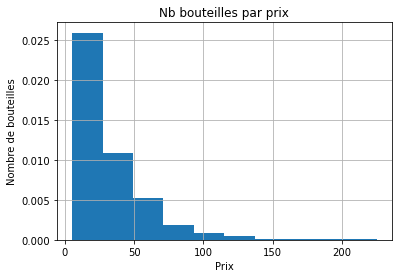

In [134]:
df_final["price"].hist(density=True)
plt.title("Nb bouteilles par prix")
plt.xlabel("Prix")
plt.ylabel("Nombre de bouteilles")
plt.show()

Le diagramme montre que la plupart des prix sont en dessous de 100€, voire de 80€

In [135]:
df_final['price_category'] = np.where(df_final['price'] < 80, 'Prix < 80€', 'Prix >=80€')
df_final['price_category'].value_counts()

Prix < 80€    679
Prix >=80€     35
Name: price_category, dtype: int64

J'affine alors le tableau pour ne montrer que les données jusqu'à 80€ et avoir un visuel moins étalé.

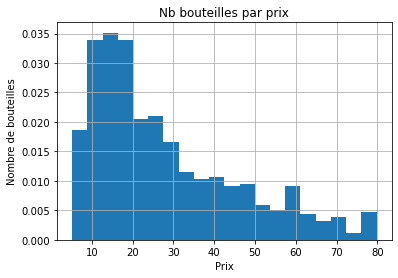

In [136]:
df_final[df_final.price < 80]["price"].hist(density=True,bins=20)
plt.title("Nb bouteilles par prix")
plt.xlabel("Prix")
plt.ylabel("Nombre de bouteilles")
plt.show()

## <a name="C10">Calcul du Z-score</a>
Selon la formule (x-µ)/σ où
- x=valeur de la cellule
- µ=moyenne 
- σ=écart type.

Méthode pour calculer les valeurs aberrantes ou atypiqyes :<br>
Pour des données supposées normalement distribuées, 95% de celles-ci se situent dans 2 écarts types, et 99.7% dans 3. [source](https://towardsdatascience.com/5-outlier-detection-methods-that-every-data-enthusiast-must-know-f917bf439210)<br>
Comme on ne cherche pas une grande précision, ne sachant pas vraiment ce que l'on cherche, un seuil de 2 sera plus pertinent.

In [137]:
mean=np.mean(df_final.price)
std_dev=np.std(df_final.price)

print (f"""La moyenne de prix est de {mean:.2f}€ et l'écart type de {std_dev:.2f}""")

La moyenne de prix est de 32.49€ et l'écart type de 27.79


In [138]:
df_final["z_score"]=(df_final.price - mean)/std_dev
df_final.sort_values("z_score", ascending=False)

,product_id,web_id,onsale_web,price,stock_quantity,stock_status,total_sales,post_title,post_excerpt,product_ca,price_category,z_score
199,4352,15940,1,225.0,0,outofstock,5.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,1125.0,Prix >=80€,6.926939
426,5001,14581,1,217.5,20,instock,0.0,David Duband Charmes-Chambertin Grand Cru 2014,Robe cerise chatoyante. Un nez de fruits rouge...,0.0,Prix >=80€,6.657068
587,5892,14983,1,191.3,10,instock,3.0,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,Cet Ambonnay évoque les grands Pinots Noirs de...,573.9,Prix >=80€,5.714318
218,4402,3510,1,176.0,8,instock,13.0,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,2288.0,Prix >=80€,5.163781
553,5767,15185,1,175.0,12,instock,0.0,Camille Giroud Clos de Vougeot 2016,<div>Ce vin provient de vignes âgées de 50 ans...,0.0,Prix >=80€,5.127798
...,...,...,...,...,...,...,...,...,...,...,...,...
97,4172,16210,1,5.7,167,instock,43.0,Maurel Pays d'Oc Chardonnay 2019,Un très joli petit chardonnay qui nous révèle ...,245.1,Prix < 80€,-0.964093
99,4174,16209,1,5.7,94,instock,6.0,Maurel Cabardès Tradition 2017,"Un joli nez aux arômes de fruits rouges, de ca...",34.2,Prix < 80€,-0.964093
560,5777,14338,1,5.7,132,instock,0.0,Maurel Pays d'Oc Cabernet-Sauvignon 2017,"<span style=""float: none; background-color: tr...",0.0,Prix < 80€,-0.964093
98,4173,16211,1,5.7,100,instock,13.0,Maurel Pays d'Oc Chenin-Colombard 2019,Ce vin d'une grande fraîcheur est élaboré à pa...,74.1,Prix < 80€,-0.964093


Je détecte les valeurs aberrantes ou atypiques en regardant les z_score supérieurs ou inférieurs au seuil de 2 écarts types.<br>
Puis, je calcule le seuil de prix à partir duquel une valeur est considérée comme un outlier : (x-µ)/σ=seuil soit x = seuil * σ + µ

In [139]:
threshold_z_score = 2
z_score_outliers=df_final[(df_final["z_score"]>threshold_z_score ) | (df_final["z_score"]<-threshold_z_score)][["post_title","price"]]
price_outlier=threshold_z_score * std_dev + mean

print (f""" Les {len(z_score_outliers)} produits suivants peuvent avoir des prix considérés comme valeurs aberrantes ou atypiques :
{z_score_outliers.sort_values("price", ascending=False)}

Le prix à partir duquel on considère qu'il y a potentiellement une anomalie est {price_outlier:.2f}€.""")

 Les 30 produits suivants peuvent avoir des prix considérés comme valeurs aberrantes ou atypiques :
                                            post_title  price
199     Champagne Egly-Ouriet Grand Cru Millésimé 2008  225.0
426     David Duband Charmes-Chambertin Grand Cru 2014  217.5
587  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...  191.3
218                               Cognac Frapin VIP XO  176.0
553                Camille Giroud Clos de Vougeot 2016  175.0
221  Cognac Frapin Château de Fontpinot 1989 20 Ans...  157.0
381  Domaine Des Croix Corton Charlemagne Grand Cru...  137.0
642             Champagne Gosset Célébris Vintage 2007  135.0
201     Champagne Egly-Ouriet Grand Cru Blanc de Noirs  126.5
511  Domaine Weinbach Gewurztraminer Grand Cru Furs...  124.8
603  Wemyss Malts Single Cask Scotch Whisky Choc 'n...  122.0
657  Domaine des Comtes Lafon Volnay 1er Cru Champa...  121.0
654  Domaine des Comtes Lafon Volnay 1er Cru Santen...  121.0
648  Domaine Clerget Echezeaux G

## <a name="C11">Calcul de l'écart interquartile</a>

Selon la formule <br>
Ecart interquartile = 3ème quartile - 1er quartile

Méthode pour calculer les outliers :<br>
Une valeur aberrante ou atypique dans une distribution est un nombre qui est plus d'une fois et demie la longueur de la boîte à l'écart du quartile inférieur ou supérieur. <br>
Si un nombre est inférieur à Q1 - 1,5×IQR ou supérieur à Q3 + 1,5×IQR, alors c'est une valeur aberrante. [Source](!https://miniwebtool.com/fr/outlier-calculator/)

In [140]:
median=np.median(df_final.price)

print (f"La médiane des prix est égale à {median}€ : il y a autant de prix au dessus de ce montant qu'en dessous.") 

La médiane des prix est égale à 23.55€ : il y a autant de prix au dessus de ce montant qu'en dessous.


In [141]:
Q1=np.median(df_final[df_final.price<=median]["price"])

Q3=np.median(df_final[df_final.price>median]["price"])

iqr = Q3-Q1

print(f"""Le premier quartile est égal à {Q1}€
Le 3ème quartile égal {Q3}€
L'écart interquartile vaut {iqr}€""")

Le premier quartile est égal à 14.1€
Le 3ème quartile égal 42.2€
L'écart interquartile vaut 28.1€


Je détecte les valeurs aberrantes ou atypiques en regardant la distribution à 1.5 écart des quartiles inférieur ou supérieur.<br>

In [142]:
threshold_iqr=1.5
iqr_outlier_Q1=Q1 - 1.5*iqr
iqr_outlier_Q3=Q3 + 1.5*iqr
iqr_outliers = df_final[(df_final.price > iqr_outlier_Q3) | (df_final.price < iqr_outlier_Q1)][["post_title","price"]]

print (f"""Les valeurs sous {iqr_outlier_Q1:.2f}€ ou au dessus de {iqr_outlier_Q3:.2f}€ peuvent être considérées comme des outliers.

Voici une liste de {len(iqr_outliers)} produits dont le prix est peut-être erroné :

{iqr_outliers.sort_values("price", ascending=False)}

""")


Les valeurs sous -28.05€ ou au dessus de 84.35€ peuvent être considérées comme des outliers.

Voici une liste de 32 produits dont le prix est peut-être erroné :

                                            post_title  price
199     Champagne Egly-Ouriet Grand Cru Millésimé 2008  225.0
426     David Duband Charmes-Chambertin Grand Cru 2014  217.5
587  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...  191.3
218                               Cognac Frapin VIP XO  176.0
553                Camille Giroud Clos de Vougeot 2016  175.0
221  Cognac Frapin Château de Fontpinot 1989 20 Ans...  157.0
381  Domaine Des Croix Corton Charlemagne Grand Cru...  137.0
642             Champagne Gosset Célébris Vintage 2007  135.0
201     Champagne Egly-Ouriet Grand Cru Blanc de Noirs  126.5
511  Domaine Weinbach Gewurztraminer Grand Cru Furs...  124.8
603  Wemyss Malts Single Cask Scotch Whisky Choc 'n...  122.0
657  Domaine des Comtes Lafon Volnay 1er Cru Champa...  121.0
654  Domaine des Comtes Lafon Vo

## <a name="C12">Représentation graphique des outliers</a>

Boxplot

<AxesSubplot:xlabel='price'>

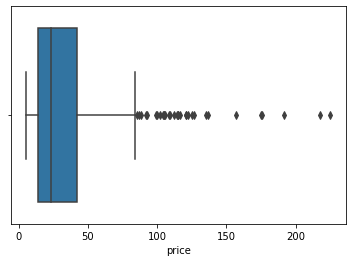

In [143]:
sns.boxplot(x=df_final["price"])

## <a name="C13">Conclusion</a>

Selon la méthode de calcul, on ne trouve pas exactement les mêmes valeurs. Mais les résultats sont proches, il n'y a que 2 lignes d'écart, et ils sont confirmés par le graphique de type "boite à moustaches".<br>
En cas de suspicion de prix erronés, la liste de 32 produits fournis permettra d'effectuer un contrôle.